# Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [50]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and check values of 2 playlist sets

In [51]:
#set keyword
KEYWORD1='classical'

In [52]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv("data/"+KEYWORD1+"_playlist_data.csv")
playlist1_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,172,spotify,Spotify,2084424
1,37i9dQZF1DWV0gynK7G6pD,Classical New Releases,56,spotify,Spotify,556845
2,37i9dQZF1DX9G9wwzwWL2k,Epic Classical,106,spotify,Spotify,466633
3,37i9dQZF1DWUvHZA1zLcjW,Chilled Classical,88,spotify,Spotify,408159
4,37i9dQZF1DX8Sz1gsYZdwj,Classical Sleep,72,spotify,Spotify,346517
5,37i9dQZF1DX4s3V2rTswzO,Classical Romance,97,spotify,Spotify,328063
6,37i9dQZF1DX0Aaer4Jzfgm,Easy Classical,66,spotify,Spotify,311679
7,1ZJpJahEFst7u8njXeGFyv,Relaxing Classical,60,sonymusicuk,Filtr UK,307932
8,37i9dQZF1DX9OZisIoJQhG,Morning Classical,47,spotify,Spotify,264392
9,37i9dQZF1DX0i61tT0OnnK,Space-themed Classical Music,77,spotify,Spotify,248385


In [53]:
playlist1_df.shape

(95, 6)

In [54]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_tracks_data.csv')
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,4SFBV7SRNG2e2kyL1F6kjU,"The Well-Tempered Clavier: Book 1, BWV 846-869...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1XORY4rQNhqkZxTze6Px90,139306,2019-03-29,65,0.2210,0.1260,...,0.0447,0.989,0.897,0.1020,0.2160,133.630,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,2.321767,classical
1,2kAgCRZPG3YQR2VMqRvLmb,The Lark Ascending,7wNkISK49lKeXuRaZcQVFe,Ralph Vaughan Williams,1Dki2WNHBcFGSs4ZACDBfq,935360,2013,65,0.0811,0.0122,...,0.0511,0.902,0.308,0.0648,0.0384,74.554,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,15.589333,classical
2,2kAgCRZPG3YQR2VMqRvLmb,The Lark Ascending,7wNkISK49lKeXuRaZcQVFe,Ralph Vaughan Williams,1Dki2WNHBcFGSs4ZACDBfq,935360,2013,65,0.0811,0.0122,...,0.0511,0.902,0.308,0.0648,0.0384,74.554,37i9dQZF1DX0Aaer4Jzfgm,Easy Classical,15.589333,classical
3,1upQiytDIEZfl9ItruoXuC,Handel / Orch. Hale: Keyboard Suite in D Minor...,1QL7yTHrdahRMpvNtn6rI2,George Frideric Handel,657D9POYWMrDMK9MWNxPHL,207266,2002,67,0.2040,0.0331,...,0.0487,0.927,0.825,0.0954,0.0547,116.200,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,3.454433,classical
4,1upQiytDIEZfl9ItruoXuC,Handel / Orch. Hale: Keyboard Suite in D Minor...,1QL7yTHrdahRMpvNtn6rI2,George Frideric Handel,657D9POYWMrDMK9MWNxPHL,207266,2002,67,0.2040,0.0331,...,0.0487,0.927,0.825,0.0954,0.0547,116.200,37i9dQZF1DX0Aaer4Jzfgm,Easy Classical,3.454433,classical


In [55]:
tracks1_df.shape

(2511, 23)

In [56]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

2341

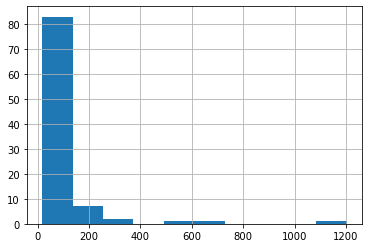

In [57]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [58]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

95

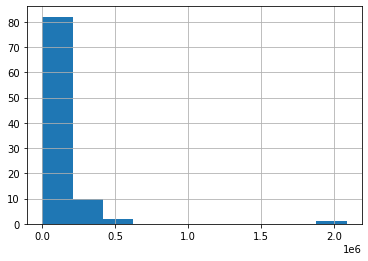

In [59]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

In [60]:
###################### set keyword
KEYWORD2='R&B'

In [61]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,40,spotify,Spotify,3186018
1,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,45,spotify,Spotify,2386964
2,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,50,spotify,Spotify,2030733
3,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,100,spotify,Spotify,860678
4,37i9dQZF1DXbirtHQBuwCo,TrenChill K-R&B,50,spotify,Spotify,481187
5,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,70,spotify,Spotify,346718
6,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,62,spotify,Spotify,326857
7,36scvoM0cRA50MCZGhv3wo,R&B Party Classics,134,sonymusicentertainment,Filtr Sweden,315857
8,37i9dQZF1DXch2nNxu927l,Suprême R&B,50,spotify,Spotify,269040
9,37i9dQZF1DX7J2y2eWxEnR,R&B Connect,60,spotify,Spotify,163568


In [62]:
playlist2_df.shape

(62, 6)

In [63]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,6nTcn8CybBcx0t7IaXEJ6O,Thank God I Found You (feat. Joe & Nas) - Make...,4iHNK0tOyZPYnBU7nGAgpQ,Mariah Carey,6zuCJaxmHKNKN5hMDF556U,251640,2000-04-18,55,0.608,0.760,...,0.0,0.3320,0.366,168.211,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.194000,R&B
1,7FWuzwapuKHTEyDJIcQOw3,Stutter (feat. Mystikal) - Double Take Remix,3zTOe1BtyTkwNvYZOxXktX,Joe,6zuCJaxmHKNKN5hMDF556U,213026,2000-04-18,55,0.767,0.759,...,0.0,0.3100,0.677,89.989,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,3.550433,R&B
2,3QE7ObGjkt1kYnhLvZPRUy,Go On Girl,21E3waRsmPlU7jZsS13rcj,Ne-Yo,52q9xNv8COtSU9phlbO5sg,261426,2007-01-01,65,0.637,0.521,...,0.0,0.0945,0.562,83.896,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.357100,R&B
3,6De63WRULDaa1fxOyLilnv,Stingy,7r8RF1tN2A4CiGEplkp1oP,Ginuwine,3t4OgAvvOzvXw8D2NHUeDR,259493,2003-04-08,54,0.622,0.573,...,0.0,0.1730,0.617,127.132,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.324883,R&B
4,08fhbfRSg7eEH0IZT7pB6a,That Girl,1goOx6gnQdUllLfSMsL4Rt,Marques Houston,4sAouJxcSwPIoT5dd6Qgj7,215960,2003-10-21,53,0.683,0.552,...,0.0,0.2210,0.519,98.946,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,3.599333,R&B


In [64]:
tracks2_df.shape

(2205, 25)

In [65]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

1493

## 2. Compare histograms of 2 playlist sets

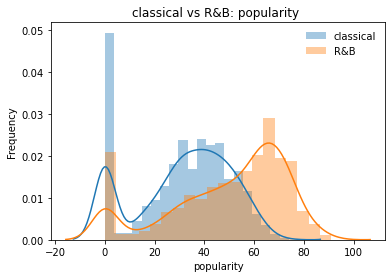

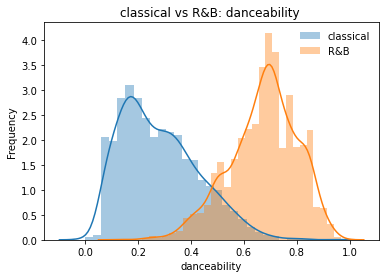

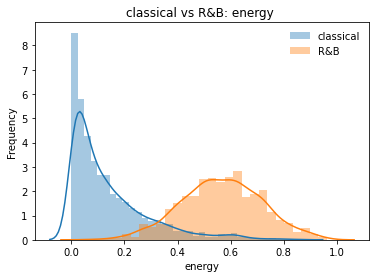

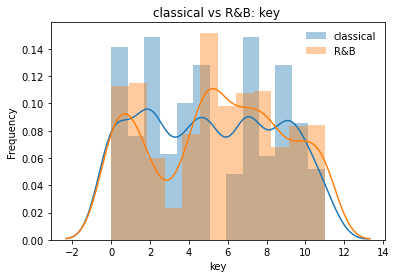

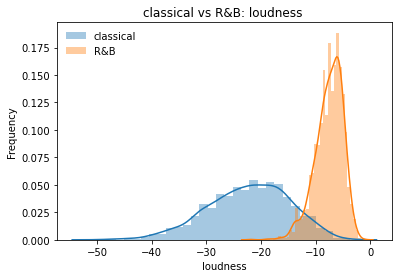

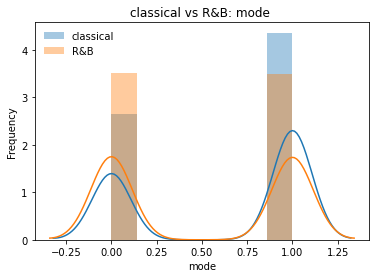

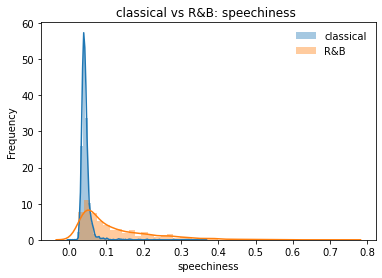

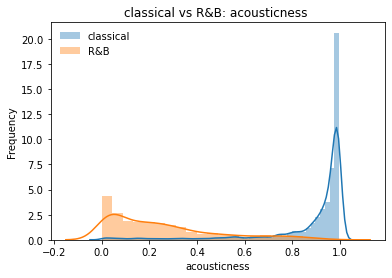

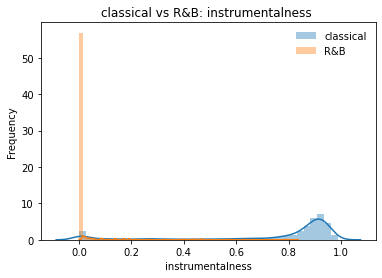

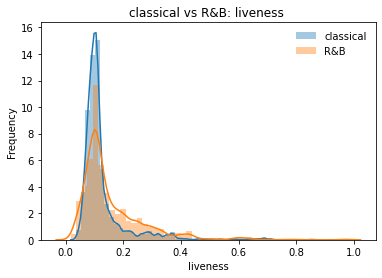

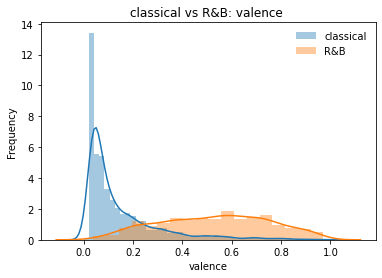

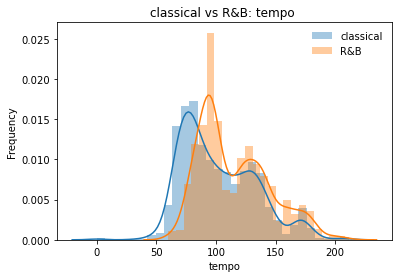

In [66]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= KEYWORD1)
    sns.distplot(tracks2_df[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


In [67]:
# Very Distinct:   energy, valence, acousticness, loudness,instrumentalness, mode (??)
# Kinda Distinct:   Popularity, tempo
# Kinda Identical: danceability, key, speechiness, liveness

# Energy, Valence & Acousticness are very distinct for Country & Jazz. Valence, Loudness, Instrumentalness and Mode can also be used.

>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

## 3. Feature Engineering

In [68]:
#get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df])
tracks1_df.shape, tracks2_df.shape, tracks_df.shape

((2511, 23), (2205, 25), (4716, 27))

In [69]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(3834, 27)

In [70]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()


count    3834.000000
mean        0.686311
std         0.190484
min         0.000000
25%         0.544787
50%         0.707100
75%         0.857890
max         1.000000
Name: loudness, dtype: float64

In [71]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    3834.000000
mean        0.500544
std         0.146901
min         0.000000
25%         0.383623
50%         0.467710
75%         0.601537
max         1.000000
Name: tempo, dtype: float64

In [72]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2})

## 4. Preview possible groupings

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


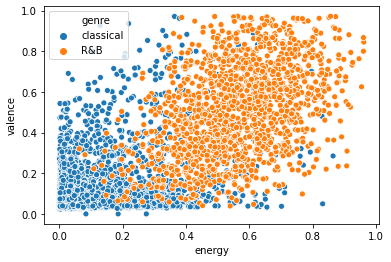

In [73]:
sns.scatterplot(data=tracks_df, x='energy', y='valence', hue='genre')

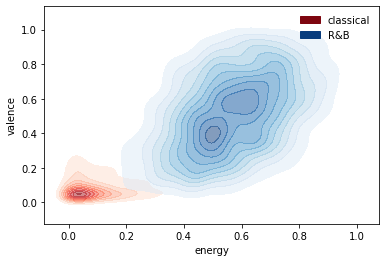

In [74]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Reds','Blues']
for n,genre in enumerate([KEYWORD1,KEYWORD2]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(df['energy'],df['valence'], ax=ax,\
                shade=True, shade_lowest=False, alpha=0.5, cmap=colormaps[n],\
                label=genre)
    
plt.legend(frameon=False)


In [75]:
#Jazz has low energy and low valence , while Country has high energy and high valence.

> Q: How would you interpret the resulting scatterplot/distribution?

## 5. Model Tuning: KNN

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

Select audio features to use for the model

In [77]:
# create feature matrix (X)
feature_cols = ['energy','valence']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(3067, 2)
Shape of y_Train:(3067,)
Shape of X_Test:(767, 2)
Shape of y_Test:(767,)


Perform KNN using K= [1..50] and validate using k-fold k = 5

In [78]:
cv_scores = []

neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50


Choose optimal value of K

The optimal number of neighbors is 23


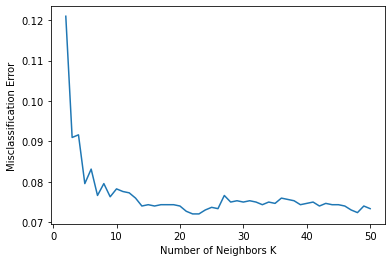

In [79]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Compute accuracy of optimal K for the testing set

In [80]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 23 is 91.916558%


Create a classification report

In [81]:
print(classification_report(y,knn_optimal.predict(X)))

              precision    recall  f1-score   support

           1       0.96      0.92      0.94      2341
           2       0.88      0.94      0.91      1493

    accuracy                           0.93      3834
   macro avg       0.92      0.93      0.92      3834
weighted avg       0.93      0.93      0.93      3834



- accuracy = all correct /all
- precision =  TP/TP+FP
- recall = TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


Plot an ROC curve for each position type prediction using the optimal KNN model

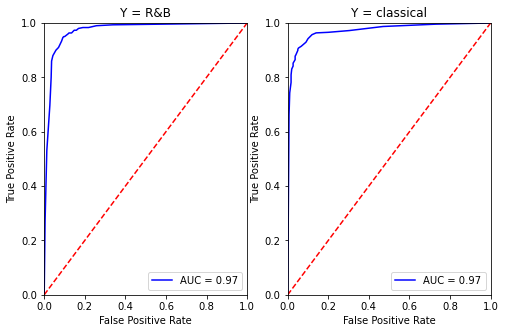

In [82]:
y_scores = knn_optimal.predict_proba(X_test)
genres = tracks_df['genre'].unique()

fig = plt.figure(figsize=[8,5])

for i in np.arange(len(genres)):
    genre_id = i+1
    y_test =[1 if k==genre_id else 0 for k in Y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    ax = fig.add_subplot('1'+str(len(genres))+str(i))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Y = '+str(genres[i]))


## 6. Model Tuning: SVM

In [83]:
from sklearn.svm import SVC

In [84]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model):
    fig,ax=plt.subplots()

    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [85]:
# create feature matrix (X)
feature_cols = ['energy','valence']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(3067, 2)
Shape of y_Train:(3067,)
Shape of X_Test:(767, 2)
Shape of y_Test:(767,)


>Q: Go back to the scatter/distplot. What seems to be the appropriate kernel type to use for the classification?

Fit model and use at least 2 kernels

In [86]:
svm_model1 = SVC(kernel='linear')
pred1 = svm_model1.fit(X_train, Y_train) 

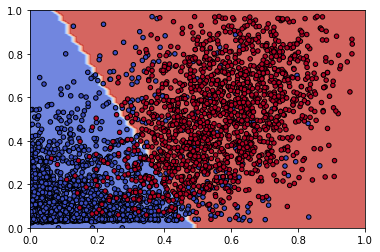

In [87]:
#plot bounds
plot_vector_bounds(X,svm_model1)

In [88]:
#show classification
print(classification_report(y,svm_model1.predict(X)))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93      2341
           2       0.88      0.91      0.89      1493

    accuracy                           0.91      3834
   macro avg       0.91      0.91      0.91      3834
weighted avg       0.92      0.91      0.91      3834



In [89]:
#polynomial kernel
svm_model2 = SVC(kernel='poly', degree=3, gamma=0.9)
pred2 = svm_model2.fit(X_train, Y_train)  

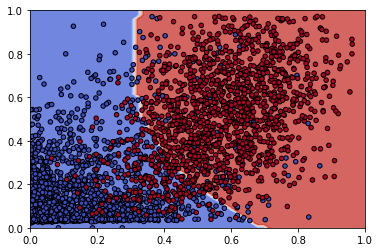

In [90]:
#plot bounds
plot_vector_bounds(X,svm_model2)

In [91]:
#show classification
print(classification_report(y,svm_model2.predict(X)))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92      2341
           2       0.91      0.84      0.87      1493

    accuracy                           0.91      3834
   macro avg       0.91      0.89      0.90      3834
weighted avg       0.91      0.91      0.91      3834



In [92]:
#polynomial kernel
svm_model3 = SVC(kernel='rbf', gamma=0.8)
pred3 = svm_model3.fit(X_train, Y_train) 

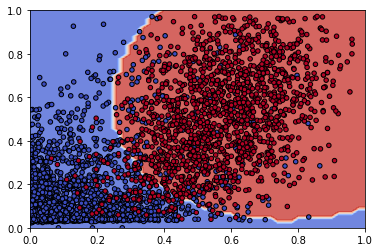

In [93]:
#plot bounds
plot_vector_bounds(X,svm_model3)

In [94]:
#show classification
print(classification_report(y,svm_model3.predict(X)))

              precision    recall  f1-score   support

           1       0.95      0.92      0.94      2341
           2       0.88      0.92      0.90      1493

    accuracy                           0.92      3834
   macro avg       0.92      0.92      0.92      3834
weighted avg       0.92      0.92      0.92      3834



## 7. Model Selection

Which between KNN and SVM performed better? 
Create a column matching the predicted genre and probability of the better model to each of the tracks

In [95]:
# kNN performed better at 79% accuracy but SVM wasn't too far behind at 77%.

In [96]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,playlist_name,duration_mins,genre,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,genre_id,predicted_genre_id,predicted_genre_prob
0,4SFBV7SRNG2e2kyL1F6kjU,"The Well-Tempered Clavier: Book 1, BWV 846-869...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1XORY4rQNhqkZxTze6Px90,139306,2019-03-29,65,0.2210,0.1260,...,Classical Essentials,2.321767,classical,NaN,NaN,NaN,NaN,1,1,0.913043
1,2kAgCRZPG3YQR2VMqRvLmb,The Lark Ascending,7wNkISK49lKeXuRaZcQVFe,Ralph Vaughan Williams,1Dki2WNHBcFGSs4ZACDBfq,935360,2013,65,0.0811,0.0122,...,Classical Essentials,15.589333,classical,NaN,NaN,NaN,NaN,1,1,1.000000
3,1upQiytDIEZfl9ItruoXuC,Handel / Orch. Hale: Keyboard Suite in D Minor...,1QL7yTHrdahRMpvNtn6rI2,George Frideric Handel,657D9POYWMrDMK9MWNxPHL,207266,2002,67,0.2040,0.0331,...,Classical Essentials,3.454433,classical,NaN,NaN,NaN,NaN,1,1,1.000000
6,0H2VhGUC3P3hvwz8rdGIpC,"Bagatelle No. 25 in A Minor, ""Für Elise"", WoO 59",2wOqMjp9TyABvtHdOSOTUS,Ludwig van Beethoven,74YXY7P1wuM4JR9hGDzPBx,203655,2019-01-18,62,0.2300,0.0487,...,Classical Essentials,3.394250,classical,NaN,NaN,NaN,NaN,1,1,1.000000
8,419qlOGNXoyICx4jO0hqaj,"Rhapsody On A Theme Of Paganini, Op.43: Variat...",0Kekt6CKSo0m5mivKcoH51,Sergei Rachmaninoff,7lj4fT2SzKOFw8rvSrVivF,174653,2015-08-28,58,0.2050,0.0525,...,Classical Essentials,2.910883,classical,NaN,NaN,NaN,NaN,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,3F5NbOfGDEhYZrFAvfMsY5,Breakfast in Bed,0UJlYTENxmj4LUc7ktnLPi,Empty Bottles,4ygV2DYGGyhynvZzhMKUfT,199250,2020-10-02,19,0.5350,0.3160,...,NaN,3.320833,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.739130
2201,5Rc8fMJ8yWBrtcY4t2UJUd,wednesday,565TZAPxLJzK6IzJb27Thi,thekidauto,3CUZjH3pTusZGbmRjl8Xjt,107297,2020-10-07,4,0.5780,0.4090,...,NaN,1.788283,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.782609
2202,4LIZSo2L8iRoJIGb1GusUA,ride,565TZAPxLJzK6IzJb27Thi,thekidauto,3CUZjH3pTusZGbmRjl8Xjt,164000,2020-10-07,4,0.6940,0.4660,...,NaN,2.733333,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.826087
2203,14kWlapvmAv49siD9wr3Ub,VEINS,6Ib0Di9b3kMxw9yD0DAyAC,Victor Internet,1IW7KywCN9sxTPwUSAFO8z,187808,2019-09-20,29,0.6630,0.6830,...,NaN,3.130133,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.913043


Check tracks mistakenly classified with but high probability 

In [97]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,playlist_name,duration_mins,genre,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,genre_id,predicted_genre_id,predicted_genre_prob
300,2nnXe7n3Vivs7OfQKRsfWD,"Vivaldi: Violin Concerto in G Minor, RV 315 ""L...",2QOIawHpSlOwXDvSqQ9YJR,Antonio Vivaldi,7nXsdgfAlJjRBBP6J0ehw2,173426,1989,60,0.362,0.5690,...,Epic Classical,2.890433,classical,NaN,NaN,NaN,NaN,1,2,0.956522
327,4PStrLiPVx3lBs2oiE53Di,Turangalîla-Symphonie: X. Final,6CS9O2pE67oq44GZuBEBuD,Olivier Messiaen,7zd2U27Gt97lJwbydZciNN,452493,2014-06-03,21,0.298,0.4710,...,Epic Classical,7.541550,classical,NaN,NaN,NaN,NaN,1,2,0.956522
357,0HL5dYL1hQN0V1bHtQskHN,Pleiades - IV. Peaux,2BmyPHk6WEt8oYMOjFR8re,Red Fish Blue Fish,3UiAxBbV2lql35deBCcvlj,720480,2006-12-05,0,0.687,0.5380,...,Epic Classical,12.008000,classical,NaN,NaN,NaN,NaN,1,2,0.956522
367,0cXaJZiBZH8gHJrBScshbv,Music in Similar Motion,69lxxQvsfAIoQbB20bEPFC,Philip Glass,42LHToYisj1n2ZH1MJFomB,682466,2012-09-04,19,0.448,0.6260,...,Epic Classical,11.374433,classical,NaN,NaN,NaN,NaN,1,2,0.956522
933,7ta31uYVAFjkfCKWs89ojr,Onward to the Edge,25RFJKlwCzUEYbfk3W8DQI,Symphony of Science,2Ek6SYb6PHRMKH6hq69ddm,216715,2011-11-09,26,0.459,0.6750,...,Space-themed Classical Music,3.611917,classical,NaN,NaN,NaN,NaN,1,2,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,6RgLvP8QbbgX81koDnNAcI,Same Way,3bAdh9KH0kxlwrfz7Uh5Aa,dexter,1vUacwroOaTfN2typaSDnp,87272,2020-09-23,36,0.580,0.1860,...,NaN,1.454533,R&B,37i9dQZF1DX942d1NzGgzk,R&B UK,37i9dQZF1DX942d1NzGgzk,R&B UK,2,1,0.913043
2080,3ddGx3bSHvhxsVMTbi5Puh,Cows and Bells,3NTdPQSh0JSz5c5AGngQyE,Shamiya Battles,4YYZKRoeeRTPqYb1IQozCR,224516,2020-10-02,34,0.376,0.1410,...,NaN,3.741933,R&B,37i9dQZF1DX942d1NzGgzk,R&B UK,37i9dQZF1DX942d1NzGgzk,R&B UK,2,1,0.956522
2113,2tWVmounSJYz1MySFsAZp2,You Don't Feel The Same,7LVC96BEVGugTAp38AajV6,Lithe,2LCf5bROttqUvc7QL71beQ,169399,2020-09-25,39,0.385,0.0812,...,NaN,2.823317,R&B,37i9dQZF1DX6GYkg76TRV8,R&B Feels,37i9dQZF1DX6GYkg76TRV8,R&B Feels,2,1,0.913043
2175,1wZqJM5FGDEl3FjHDxDyQd,Come and See Me (feat. Drake),2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2FXGUAESmG5l9YPrzWPvHI,235477,2016-08-12,73,0.717,0.3470,...,NaN,3.924617,R&B,37i9dQZF1DWXbttAJcbphz,I Love My '10s R&B,37i9dQZF1DWXbttAJcbphz,I Love My '10s R&B,2,1,0.913043


> Q: Focus on any of the songs you know that made it in the misclassified list (you may listen to some of them) 
    Does it make sense that the model misclassfied this song? Why or why not?

In [98]:
#Waiting Around by Aisha Badru doesn't sound so much like Country. 
#It's very mellow (low valence) and low energy (it only picks up towards the latter part),
#which made the model classify it as Jazz.

#Supernova by Caitlyn Smith is similar that it sounds very mellow and barely has any energy.

>Q: Would this model correctly classify tracks from the Spotify charting tracks dataset?

In [99]:
#Q: maybe not as the songs in the Spotify charting tracks are mostly neither Country nor Jazz.

In [101]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,4,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,4,0.795,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,80,0.762,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


In [102]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,4,0.768,0.517,...,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,2,1.000000
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,...,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,2,0.869565
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,4,0.795,0.615,...,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009,2,0.913043
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,...,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873,2,0.826087
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,80,0.762,0.700,...,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073,2,1.000000


In [103]:
#Check tracks classified with higher probability
chart_tracks_df.sort_values(['predicted_genre_prob'])[:10]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
1333,2KoWHNtJrbE0WxWfQjYjyu,Urong Sulong,4HPuFCMUiNcV4f3ew0flbZ,Alisson Shore,5PiVRsrfskS9xkti5BR9dL,267049,2018-08-06,26,0.713,0.342,...,-8.613,1,0.0802,0.55400,0.000008,0.1130,0.6620,79.977,2,0.521739
949,2OpBganfGk2GVdSlRdxzaX,Better,6LuN9FCkKOj5PcnpouEgny,Khalid,4UNwL1B7JoymNUiTFJa52B,229320,2018-10-19,61,0.695,0.586,...,-10.315,0,0.0658,0.10200,0.317000,0.1130,0.1120,98.035,2,0.521739
935,32FQqB67FkHkFSeXnuSYV0,"All Tonight - From ""Exes Baggage""",6sEgMZsruguWlnwVdiz4IX,Midnight Meetings,7cRnknPIiD27rqmi4SnFQ4,189941,2018-10-05,44,0.498,0.392,...,-10.683,1,0.0423,0.53900,0.000005,0.0937,0.1640,78.010,2,0.521739
879,3k2IoyIaSf5NmrKMpG0qYQ,2002 - Acoustic,1uuV1avDy9Eup5gYHXVG05,Amber Leigh Irish,6jME1f4YIAyrphCw1Gnpov,145056,2018-08-24,52,0.589,0.297,...,-9.335,1,0.0825,0.84200,0.000000,0.0736,0.6120,165.797,1,0.521739
792,2Pelm9xgLSC78mRk0jbOKb,Sila - Acoustic,0jKQrxK2zHqxyOAyIMrUQt,SUD,1HHK0oozKwo9piao0wO25d,319608,2016-03-18,49,0.751,0.281,...,-9.282,1,0.0429,0.74300,0.000000,0.2600,0.3860,124.890,2,0.521739
771,7wBJfHzpfI3032CSD7CE2m,STARGAZING,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,41GuZcammIkupMPKH2OJ6I,270714,2018-08-03,81,0.487,0.789,...,-3.690,1,0.0440,0.00947,0.000004,0.1890,0.0564,150.007,2,0.521739
1917,7EoLMCwL7LfLsLF8acLpih,Landas,28B54RKpJrEmDoGSTjsfY6,Magnus Haven,0Q66wsJckZoOdDhdMSlXvy,310481,2020-03-06,50,0.430,0.547,...,-7.767,1,0.0287,0.22200,0.000002,0.0842,0.1210,149.841,2,0.521739
57,7j4IOedQQtMpSHEvyXZsHI,ILYSB - STRIPPED,49tQo2QULno7gxHutgccqF,LANY,0aI9MJnKQpQBdzEL4evb9L,244820,2015-12-11,0,0.564,0.408,...,-8.250,1,0.0793,0.53800,0.000191,0.1100,0.1280,83.814,1,0.521739
767,1snWlbcbgQpJfknoI30DWG,Darkside,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,64WDoAGyTcPlSIFAiSDsB0,211866,2018-07-27,68,0.425,0.642,...,-5.060,0,0.0502,0.16400,0.000000,0.1180,0.1120,170.008,2,0.521739
62,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,62,0.696,0.262,...,-15.073,1,0.0310,0.51900,0.000000,0.0669,0.2650,84.007,2,0.521739


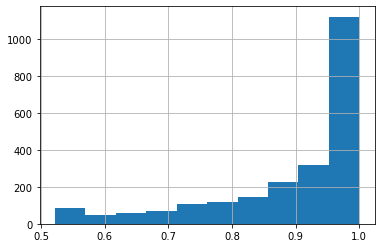

In [104]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

## Day Deliverable
1. *Genre Classification (Individual)*

    A. Choose up to 6 music genres and obtain track data from the genre's top 20 most-followed playlists in Spotify. A group may distribute the data gathering task by assigning a genre to each person and then pooling all the gathered data in one shared folder.
    
   B. Pick any 2 music genres as your groupings for the classification exercise and repeat Steps 1-7. Make sure to answer the guide questions for each step
   
   C. Increase the number of features included in the models and repeat Steps 1-7 (but skip the plotting code cells). How does this affect the model scores?
   
   D. Modify the notebook to take in **any 3 music genres** as groupings and repeat Steps 1-7.
   

2. *(Optional, but useful to do ahead for your sprint project)*

    There are almost [innumerable](https://www.musicgenreslist.com/) named music genres online, but a summarized list  may be found [here](https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/). Can you build a model that can predict **at least 5 genres** listed in the latter with **>70% classification accuracy**?
    
    
3. *(Truly optional)*

    Can you build a **decision-tree**-based genre classification model with a >70% classification accuracy?



In [105]:
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,playlist_name,duration_mins,genre,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,genre_id,predicted_genre_id,predicted_genre_prob
0,4SFBV7SRNG2e2kyL1F6kjU,"The Well-Tempered Clavier: Book 1, BWV 846-869...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1XORY4rQNhqkZxTze6Px90,139306,2019-03-29,65,0.2210,0.1260,...,Classical Essentials,2.321767,classical,NaN,NaN,NaN,NaN,1,1,0.913043
1,2kAgCRZPG3YQR2VMqRvLmb,The Lark Ascending,7wNkISK49lKeXuRaZcQVFe,Ralph Vaughan Williams,1Dki2WNHBcFGSs4ZACDBfq,935360,2013,65,0.0811,0.0122,...,Classical Essentials,15.589333,classical,NaN,NaN,NaN,NaN,1,1,1.000000
3,1upQiytDIEZfl9ItruoXuC,Handel / Orch. Hale: Keyboard Suite in D Minor...,1QL7yTHrdahRMpvNtn6rI2,George Frideric Handel,657D9POYWMrDMK9MWNxPHL,207266,2002,67,0.2040,0.0331,...,Classical Essentials,3.454433,classical,NaN,NaN,NaN,NaN,1,1,1.000000
6,0H2VhGUC3P3hvwz8rdGIpC,"Bagatelle No. 25 in A Minor, ""Für Elise"", WoO 59",2wOqMjp9TyABvtHdOSOTUS,Ludwig van Beethoven,74YXY7P1wuM4JR9hGDzPBx,203655,2019-01-18,62,0.2300,0.0487,...,Classical Essentials,3.394250,classical,NaN,NaN,NaN,NaN,1,1,1.000000
8,419qlOGNXoyICx4jO0hqaj,"Rhapsody On A Theme Of Paganini, Op.43: Variat...",0Kekt6CKSo0m5mivKcoH51,Sergei Rachmaninoff,7lj4fT2SzKOFw8rvSrVivF,174653,2015-08-28,58,0.2050,0.0525,...,Classical Essentials,2.910883,classical,NaN,NaN,NaN,NaN,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,3F5NbOfGDEhYZrFAvfMsY5,Breakfast in Bed,0UJlYTENxmj4LUc7ktnLPi,Empty Bottles,4ygV2DYGGyhynvZzhMKUfT,199250,2020-10-02,19,0.5350,0.3160,...,NaN,3.320833,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.739130
2201,5Rc8fMJ8yWBrtcY4t2UJUd,wednesday,565TZAPxLJzK6IzJb27Thi,thekidauto,3CUZjH3pTusZGbmRjl8Xjt,107297,2020-10-07,4,0.5780,0.4090,...,NaN,1.788283,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.782609
2202,4LIZSo2L8iRoJIGb1GusUA,ride,565TZAPxLJzK6IzJb27Thi,thekidauto,3CUZjH3pTusZGbmRjl8Xjt,164000,2020-10-07,4,0.6940,0.4660,...,NaN,2.733333,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.826087
2203,14kWlapvmAv49siD9wr3Ub,VEINS,6Ib0Di9b3kMxw9yD0DAyAC,Victor Internet,1IW7KywCN9sxTPwUSAFO8z,187808,2019-09-20,29,0.6630,0.6830,...,NaN,3.130133,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.913043


In [106]:
#1C REDO USING MORE FEATURES (energy, valence, acousticness, loudness,instrumentalness)

In [107]:
#REDO STEP 5 kNN Classifier Model
# create feature matrix (X)
feature_cols = ['energy','valence','acousticness','loudness','instrumentalness']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(3067, 5)
Shape of y_Train:(3067,)
Shape of X_Test:(767, 5)
Shape of y_Test:(767,)


In [108]:
cv_scores = []

neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50


The optimal number of neighbors is 24


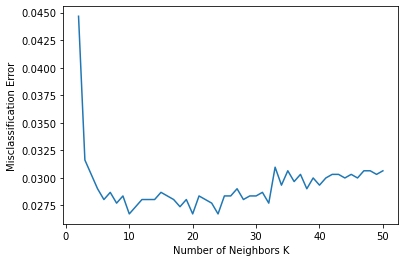

In [109]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [110]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 24 is 97.392438%


In [111]:
print(classification_report(y,knn_optimal.predict(X)))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98      2341
           2       0.95      0.98      0.97      1493

    accuracy                           0.97      3834
   macro avg       0.97      0.97      0.97      3834
weighted avg       0.97      0.97      0.97      3834



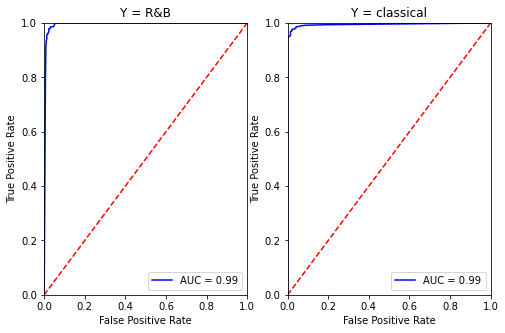

In [112]:
y_scores = knn_optimal.predict_proba(X_test)
genres = tracks_df['genre'].unique()

fig = plt.figure(figsize=[8,5])

for i in np.arange(len(genres)):
    genre_id = i+1
    y_test =[1 if k==genre_id else 0 for k in Y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    ax = fig.add_subplot('1'+str(len(genres))+str(i))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Y = '+str(genres[i]))


In [113]:
#6 SVM MODEL
from sklearn.svm import SVC

In [114]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model):
    fig,ax=plt.subplots()

    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [115]:
# create feature matrix (X)
feature_cols = ['energy','valence','acousticness','loudness','instrumentalness']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(3067, 5)
Shape of y_Train:(3067,)
Shape of X_Test:(767, 5)
Shape of y_Test:(767,)


In [116]:
svm_model1 = SVC(kernel='linear')
pred1 = svm_model1.fit(X_train, Y_train) 

In [117]:
#show classification
print(classification_report(y,svm_model1.predict(X)))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      2341
           2       0.96      0.98      0.97      1493

    accuracy                           0.98      3834
   macro avg       0.97      0.98      0.98      3834
weighted avg       0.98      0.98      0.98      3834



In [118]:
#polynomial kernel
svm_model2 = SVC(kernel='poly', degree=3, gamma=0.9)
pred2 = svm_model2.fit(X_train, Y_train)  

In [119]:
#show classification
print(classification_report(y,svm_model2.predict(X)))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98      2341
           2       0.96      0.98      0.97      1493

    accuracy                           0.98      3834
   macro avg       0.97      0.98      0.98      3834
weighted avg       0.98      0.98      0.98      3834



In [120]:
#polynomial kernel
svm_model3 = SVC(kernel='rbf', gamma=0.8)
pred3 = svm_model3.fit(X_train, Y_train) 

In [121]:
#show classification
print(classification_report(y,svm_model3.predict(X)))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      2341
           2       0.96      0.98      0.97      1493

    accuracy                           0.98      3834
   macro avg       0.97      0.98      0.98      3834
weighted avg       0.98      0.98      0.98      3834



In [122]:
# both kNN and SVM models equally performed at 88% accuracy.

In [123]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,playlist_name,duration_mins,genre,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,genre_id,predicted_genre_id,predicted_genre_prob
0,4SFBV7SRNG2e2kyL1F6kjU,"The Well-Tempered Clavier: Book 1, BWV 846-869...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1XORY4rQNhqkZxTze6Px90,139306,2019-03-29,65,0.2210,0.1260,...,Classical Essentials,2.321767,classical,NaN,NaN,NaN,NaN,1,1,1.000000
1,2kAgCRZPG3YQR2VMqRvLmb,The Lark Ascending,7wNkISK49lKeXuRaZcQVFe,Ralph Vaughan Williams,1Dki2WNHBcFGSs4ZACDBfq,935360,2013,65,0.0811,0.0122,...,Classical Essentials,15.589333,classical,NaN,NaN,NaN,NaN,1,1,1.000000
3,1upQiytDIEZfl9ItruoXuC,Handel / Orch. Hale: Keyboard Suite in D Minor...,1QL7yTHrdahRMpvNtn6rI2,George Frideric Handel,657D9POYWMrDMK9MWNxPHL,207266,2002,67,0.2040,0.0331,...,Classical Essentials,3.454433,classical,NaN,NaN,NaN,NaN,1,1,1.000000
6,0H2VhGUC3P3hvwz8rdGIpC,"Bagatelle No. 25 in A Minor, ""Für Elise"", WoO 59",2wOqMjp9TyABvtHdOSOTUS,Ludwig van Beethoven,74YXY7P1wuM4JR9hGDzPBx,203655,2019-01-18,62,0.2300,0.0487,...,Classical Essentials,3.394250,classical,NaN,NaN,NaN,NaN,1,1,1.000000
8,419qlOGNXoyICx4jO0hqaj,"Rhapsody On A Theme Of Paganini, Op.43: Variat...",0Kekt6CKSo0m5mivKcoH51,Sergei Rachmaninoff,7lj4fT2SzKOFw8rvSrVivF,174653,2015-08-28,58,0.2050,0.0525,...,Classical Essentials,2.910883,classical,NaN,NaN,NaN,NaN,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,3F5NbOfGDEhYZrFAvfMsY5,Breakfast in Bed,0UJlYTENxmj4LUc7ktnLPi,Empty Bottles,4ygV2DYGGyhynvZzhMKUfT,199250,2020-10-02,19,0.5350,0.3160,...,NaN,3.320833,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.791667
2201,5Rc8fMJ8yWBrtcY4t2UJUd,wednesday,565TZAPxLJzK6IzJb27Thi,thekidauto,3CUZjH3pTusZGbmRjl8Xjt,107297,2020-10-07,4,0.5780,0.4090,...,NaN,1.788283,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,0.708333
2202,4LIZSo2L8iRoJIGb1GusUA,ride,565TZAPxLJzK6IzJb27Thi,thekidauto,3CUZjH3pTusZGbmRjl8Xjt,164000,2020-10-07,4,0.6940,0.4660,...,NaN,2.733333,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,1.000000
2203,14kWlapvmAv49siD9wr3Ub,VEINS,6Ib0Di9b3kMxw9yD0DAyAC,Victor Internet,1IW7KywCN9sxTPwUSAFO8z,187808,2019-09-20,29,0.6630,0.6830,...,NaN,3.130133,R&B,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,3rA95eP8FhZHEV7pJga7Pz,r&b catalog 🎹,2,2,1.000000


In [124]:
#mistakenly predicted tracks
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,playlist_name,duration_mins,genre,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,genre_id,predicted_genre_id,predicted_genre_prob
229,6iSPRXGvT2VGHb1Duf9PAw,L'Orfeo - Prologo: Toccata,5iAhVgz6P8Nylxijb0C65v,Claudio Monteverdi,4GB607yBwhYDMdFonkYXI3,87960,2002-01-01,43,0.619,0.342,...,Classical Essentials,1.466000,classical,NaN,NaN,NaN,NaN,1,2,1.000000
933,7ta31uYVAFjkfCKWs89ojr,Onward to the Edge,25RFJKlwCzUEYbfk3W8DQI,Symphony of Science,2Ek6SYb6PHRMKH6hq69ddm,216715,2011-11-09,26,0.459,0.675,...,Space-themed Classical Music,3.611917,classical,NaN,NaN,NaN,NaN,1,2,0.958333
935,5q45u6NsnW3EiNnpjBmwOC,Keep Talking - 2011 Remaster,0k17h0D3J5VfsdmQ1iZtE9,Pink Floyd,7wzStEU2keGohEu8jpVMZW,370666,1994-03-28,46,0.496,0.771,...,Space-themed Classical Music,6.177767,classical,NaN,NaN,NaN,NaN,1,2,0.958333
1124,1304Brw70MJMGq2l5UZmqv,"Piano Concerto No. 2 (feat. Jeff Tain Watts, S...",7J9YpX3eZIWlcRbDnbny88,Troy Roberts,2HmRK7gOKbifwwMDCB4hpA,520189,2015-03-01,29,0.416,0.375,...,Jazz – Classical Crossings,8.669817,classical,NaN,NaN,NaN,NaN,1,2,0.958333
1130,75jobUBuqWb6hanrIg0hEk,Valse Triste - Rudy Van Gelder Edition/Digital...,0ZqhrTXYPA9DZR527ZnFdO,Wayne Shorter,1ADe5AyVKt7jMBSo58SjyR,463306,2006-09-12,32,0.377,0.491,...,Jazz – Classical Crossings,7.721767,classical,NaN,NaN,NaN,NaN,1,2,0.916667
1139,5l39TUVtu171qtrqYru0BK,1er Mov. Concierto De Brandemburgo Nº 5,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,2BBo3FPCZUt50UgGGFThfh,194000,2007-01-01,23,0.596,0.797,...,Jazz – Classical Crossings,3.233333,classical,NaN,NaN,NaN,NaN,1,2,0.916667
1168,6h7lWgLen22xFGcuLUGRIi,A Million Dreams,0l1nmcjqNlk9dQHb6H4sLR,Collabro,4y7Hq4QGQLGtFkmC955Q3r,260226,2019-11-12,37,0.362,0.586,...,Pop Goes Classical,4.337100,classical,NaN,NaN,NaN,NaN,1,2,0.958333
1205,5xEBEZi40MdHruE01O3ws6,Take Me to Church,4ZZVk8undJqXJqQ1GHCTp2,Simply Three,1OruJmAvXK5Pa3BawvswSJ,250600,2016-02-01,39,0.257,0.793,...,Pop Goes Classical,4.176667,classical,NaN,NaN,NaN,NaN,1,2,0.958333
1212,4yw5GYrOrrJ53yfYuxSCOz,Better Days,5vvlfKQdn6amTImsjy9Si5,Dallas String Quartet,29OyLTZAtJ1URhQlHPDELU,242834,2020-07-08,33,0.301,0.712,...,Pop Goes Classical,4.047233,classical,NaN,NaN,NaN,NaN,1,2,0.916667
1238,5tjNdw1pl6Es0KIEDjdEsr,Empire State of Mind,1IQuA3YDUhUozBo7r30v1n,Josh Vietti,1RBRcHt2NBrTqgiGPOU737,289756,2012-10-30,33,0.661,0.830,...,Pop Goes Classical,4.829267,classical,NaN,NaN,NaN,NaN,1,2,0.958333


In [125]:
#Same as before, the mistakenly classified songs as Jazz but are actualy Country are usually more mellow and have lower energy.
#The inverse also holds true. Louder and more upbeat Jazz are misclassified as Country.

In [127]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,4,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,4,0.795,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,80,0.762,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


In [128]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,4,0.768,0.517,...,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,1,1.0
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,...,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,1,1.0
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,4,0.795,0.615,...,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009,1,1.0
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,...,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873,1,1.0
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,80,0.762,0.700,...,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073,1,1.0


In [129]:
#Check tracks classified with higher probability
chart_tracks_df.sort_values(['predicted_genre_prob'])[:10]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
2095,3FARQP8fA49bSsTWjNyWmY,Secret Story of the Swan,5r1tUTxVSgvBHnoDuDODPH,IZ*ONE,0Feph4xWbYik7e0oLR08sN,192333,2020-06-15,71,0.703,0.941,...,-0.995,0,0.0808,0.1310,0.000000,0.319,0.758,102.969,2,0.625000
1961,2HtcPHFdo7eu4Ilbvb0BVI,Feel Special,7n2Ycct7Beij7Dj7meI4X0,TWICE,5MmndGNrJgTLd5W7HNmVST,206866,2019-09-23,76,0.709,0.959,...,-1.339,1,0.0603,0.0296,0.001880,0.107,0.644,128.983,1,0.750000
1591,14rWuS6yllHOdfZ8sZsZUj,Feel Special,7n2Ycct7Beij7Dj7meI4X0,TWICE,5efEhTY3yPlGU4Ofu2yi7F,206868,2019-09-23,66,0.709,0.959,...,-1.339,1,0.0603,0.0296,0.001880,0.107,0.644,128.983,1,0.750000
988,1fRaznZsAB2i63TtmYv2Hc,La Vie en Rose,5r1tUTxVSgvBHnoDuDODPH,IZ*ONE,7tggzWGzVusg9SEKqbJYpt,218993,2018-10-29,67,0.698,0.908,...,-1.211,0,0.0548,0.0899,0.000000,0.115,0.606,115.975,1,0.791667
720,5Ek40FyMPprcvtyZDjqylX,What is Love?,7n2Ycct7Beij7Dj7meI4X0,TWICE,4JRX1T8VKbEMvTtnQXnLYM,208238,2018-07-09,60,0.573,0.910,...,-1.578,1,0.0640,0.0846,0.000000,0.266,0.602,169.982,1,0.958333
2067,5NhDDt5Zy8yGOECN3PLRdE,FIREWORK,7n2Ycct7Beij7Dj7meI4X0,TWICE,5KsduuDNWzt65TaHzmtciv,193466,2020-06-01,59,0.700,0.920,...,-1.532,0,0.0536,0.1150,0.000003,0.701,0.685,108.006,1,0.958333
636,2r5oD7twaQTsv5KoRS6v16,Really,41MozSoPIsD1dJM0CLPjZF,BLACKPINK,1HwIUaaEuRsxsIyssqtGLH,197789,2018-06-15,64,0.696,0.881,...,-2.082,1,0.1040,0.0235,0.000000,0.277,0.947,142.019,1,0.958333
472,2PhG74FocRobLC8pP9cIBI,What is Love?,7n2Ycct7Beij7Dj7meI4X0,TWICE,3RpKeK21tOln0iyoE8KGC8,208238,2018-04-09,38,0.573,0.910,...,-1.578,1,0.0640,0.0846,0.000000,0.266,0.602,169.982,1,0.958333
1315,5qA5DAR5xTjQUGrl0eBbmR,Really,41MozSoPIsD1dJM0CLPjZF,BLACKPINK,2zwfcNqJe7IT1RwgVyv1ug,197789,2018-06-15,65,0.695,0.881,...,-2.082,1,0.1040,0.0234,0.000000,0.277,0.947,142.018,1,0.958333
702,7AWtaOSb7cgi16wJr3mkuf,REALLY - KR Ver.,41MozSoPIsD1dJM0CLPjZF,BLACKPINK,4l87mak80qeOiZwXM5bRuM,197789,2018-06-15,48,0.695,0.882,...,-2.080,1,0.1040,0.0234,0.000000,0.315,0.947,142.025,1,0.958333


In [ ]:
#still not doing a good job predicting since most of the tracks in the spotify charts aren't Country or Jazz.